In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets


from src.data_processing.load_data import *
from src.data_science.data import *
from src.figures.Plot import *

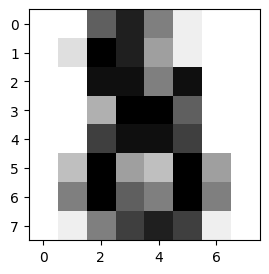

In [19]:
# Load the digits dataset
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [20]:
# Renormalize the data
X = digits.data / 255.0
y = digits.target


In [21]:
X_train, X_test, y_train, y_test = create_train_test_split(X, y, test_size = 250, random_state=42)

In [22]:
print("Size of the train set:", X_train.shape[0])
print("Size of the test set:", X_test.shape[0])
print("Size of the target train set:", y_train.shape[0])
print("Size of the target test set:", y_test.shape[0])

Size of the train set: 1547
Size of the test set: 250
Size of the target train set: 1547
Size of the target test set: 250


In [23]:
unique_targets = np.unique(digits.target)
print("Unique target values:", unique_targets)

Unique target values: [0 1 2 3 4 5 6 7 8 9]


In [24]:
model = LogisticRegression( solver = "lbfgs", random_state = 42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model:", accuracy)

Accuracy of Logistic Regression model: 0.896


In [25]:
test_sizes = [200, 300, 400]
data_dict = split_data_by_test_sizes(X_train, y_train, test_sizes, random_state=42)
for test_size, data in data_dict.items():
    X_train_new = data['X_train_new']
    Y_train_new = data['Y_train_new']
    X_pool = data['X_pool']
    Y_pool = data['Y_pool']
    
    print(f"For test size {test_size}:")
    print(f"X_train_new shape: {X_train_new.shape}, Y_train_new shape: {Y_train_new.shape}")
    print(f"X_pool shape: {X_pool.shape}, Y_pool shape: {Y_pool.shape}")

For test size 200:
X_train_new shape: (200, 64), Y_train_new shape: (200,)
X_pool shape: (1347, 64), Y_pool shape: (1347,)
For test size 300:
X_train_new shape: (300, 64), Y_train_new shape: (300,)
X_pool shape: (1247, 64), Y_pool shape: (1247,)
For test size 400:
X_train_new shape: (400, 64), Y_train_new shape: (400,)
X_pool shape: (1147, 64), Y_pool shape: (1147,)


In [26]:
max_number_iterations = 400

score_list_random = active_learning(X_train_new, Y_train_new, X_test, y_test, X_pool, Y_pool, max_number_iterations, 'random')

# Run active learning with least confidence strategy
score_list_least_confidence = active_learning(X_train_new, Y_train_new, X_test, y_test, X_pool, Y_pool, max_number_iterations, 'least_confidence')

# Run active learning with entropy strategy
score_list_entropy = active_learning(X_train_new, Y_train_new, X_test, y_test, X_pool, Y_pool, max_number_iterations, 'entropy')


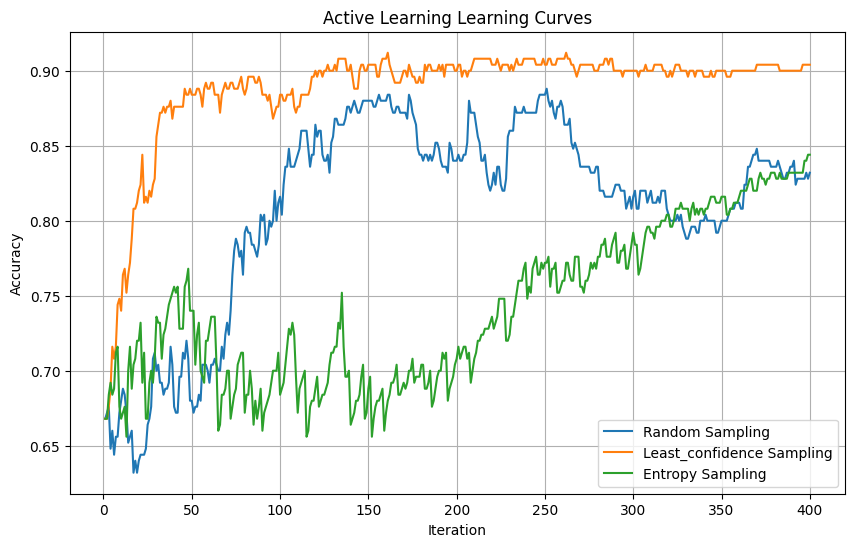

In [27]:
score_lists = {
    'random': score_list_random,
    'least_confidence': score_list_least_confidence,
    'entropy': score_list_entropy
}


plot_learning_curve_single(score_lists, max_number_iterations)

We can see that for low iterations, we obviously have low accuracy for the 3 models but the entropy and least confidence have better performances than the random sampling. Whenever the number of iterations increase the least confidence becomes the better model of the 3 as its accuracy keeps getting higher and reaches 0.9. Meanwhile the random sampling comes second with an accuracy of 0.8 and the entropy comes last with an accuracy of around 0.77.

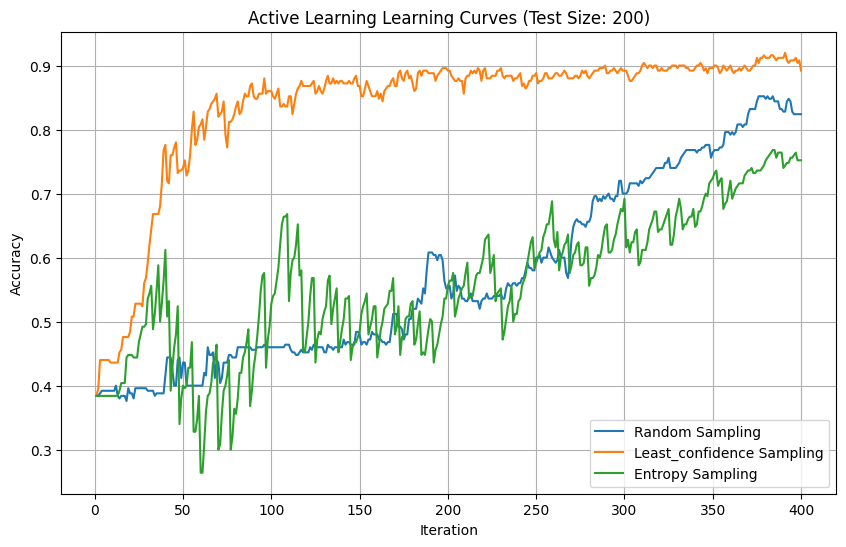

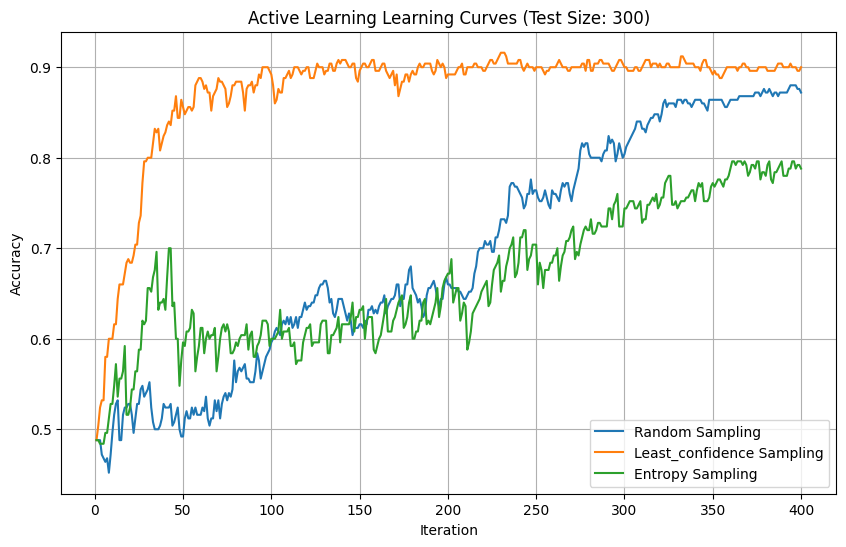

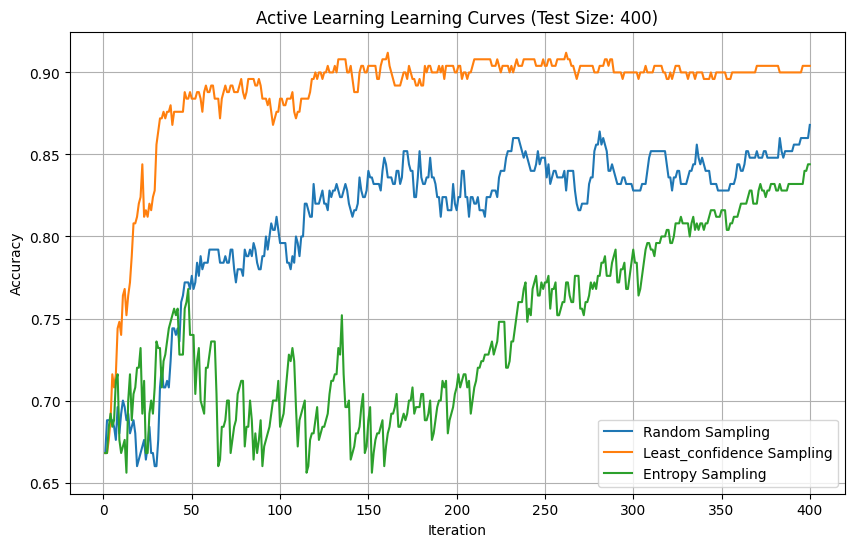

In [28]:
score_lists_dict = {}

# Iterate through each test size and run active learning
for test_size, data in data_dict.items():
    X_train_new = data['X_train_new']
    Y_train_new = data['Y_train_new']
    X_pool = data['X_pool']
    Y_pool = data['Y_pool']
    
    # Initialize lists to store scores for each strategy
    score_lists = {'random': [], 'least_confidence': [], 'entropy': []}
    
    # Run active learning with each strategy
    for strategy in ['random', 'least_confidence', 'entropy']:
        scores = active_learning(X_train_new, Y_train_new, X_test, y_test, X_pool, Y_pool, max_number_iterations, strategy)
        score_lists[strategy] = scores
    
    # Store the score lists for the current test size
    score_lists_dict[test_size] = score_lists

# Plot the learning curves for each test size
plot_learning_curve_test_sizes(score_lists_dict, max_number_iterations)

We have these data shapes for each size:

**For test size 200:**

X_train_new shape: (200, 64), Y_train_new shape: (200,)

X_pool shape: (1347, 64), Y_pool shape: (1347,)

**For test size 300:** 

X_train_new shape: (300, 64), Y_train_new shape: (300,)

X_pool shape: (1247, 64), Y_pool shape: (1247,)

**For test size 400:**

X_train_new shape: (400, 64), Y_train_new shape: (400,)

X_pool shape: (1147, 64), Y_pool shape: (1147,)

We can still notice that the least confidence is the best out of the 3.

All 3 algorithms get better when we increase the test size.

At lower test sizes, the entropy and the random sampling algorithm keep swaping between which is better, but at a test size 400, we can notice that the random sampling is much better than the entropy in almost all iterations.
